In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

%matplotlib inline 

# 1 Load Data

## 1.1 Load "takehome_users" 

In [2]:
user_df = pd.read_csv('takehome_users.csv', encoding='latin-1')


In [3]:
user_df.tail()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN
11999,12000,2014-01-26 08:57:12,Lima Thaís,ThaisMeloLima@hotmail.com,SIGNUP,1.390727e+09,0,1,0,NaN


In [4]:
user_df.rename(columns = {'object_id':'user_id'}, inplace = True)

In [5]:
user_df.dtypes

user_id                         int64
creation_time                  object
name                           object
email                          object
creation_source                object
last_session_creation_time    float64
opted_in_to_mailing_list        int64
enabled_for_marketing_drip      int64
org_id                          int64
invited_by_user_id            float64
dtype: object

In [6]:
user_df.isnull().sum()

user_id                          0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
dtype: int64

In [7]:
user_df['creation_source'].value_counts()

ORG_INVITE            4254
GUEST_INVITE          2163
PERSONAL_PROJECTS     2111
SIGNUP                2087
SIGNUP_GOOGLE_AUTH    1385
Name: creation_source, dtype: int64

Five types of creation_source (how user's account was created) include:
* PERSONAL_PROJECTS: invited to join another user's personal workspace
* GUEST_INVITE: invited to an organization as a guest (limited permissions)
* ORG_INVITE: invited to an organization (as a full member)
* SIGNUP: signed up via the website
* SIGNUP_GOOGLE_AUTH: signed up using Google Authentication (using a Google email account for their login id)

In [8]:
user_df['last_session_creation_time'] = pd.to_datetime(user_df['last_session_creation_time'],unit='s')
user_df['creation_time'] = pd.to_datetime(user_df['creation_time'])

Check values of the `int` type:

In [9]:
user_df['opted_in_to_mailing_list'].value_counts()

0    9006
1    2994
Name: opted_in_to_mailing_list, dtype: int64

In [10]:
user_df['enabled_for_marketing_drip'].value_counts() 

0    10208
1     1792
Name: enabled_for_marketing_drip, dtype: int64

Columns `opted_in_to_mailing_list` and `enabled_for_marketing_drip` are unbalanced

In [11]:
user_df['org_id'] = user_df['org_id'].astype('str')
user_df['org_id'].value_counts()

0      319
1      233
2      201
3      168
4      159
      ... 
396      9
397      8
400      8
386      7
416      2
Name: org_id, Length: 417, dtype: int64

`org_id` (the organization that users belong to) have 417 unique groups

Change data types:

In [12]:
user_df['user_id'] = user_df['user_id'].astype(str)

In [13]:
user_df['invited_by_user_id'] = user_df['invited_by_user_id'].fillna(-1)
user_df['invited_by_user_id'] = user_df['invited_by_user_id'].astype(int)
user_df['invited_by_user_id'] = user_df['invited_by_user_id'].astype(str)
user_df['invited_by_user_id'] = user_df['invited_by_user_id'].replace('-1', np.nan)

In [14]:
user_df['invited'] = (~user_df['invited_by_user_id'].isnull())

In [15]:
user_df['invited'] = user_df['invited'].replace({True:1,False:0})

In [16]:
user_df['active_duration'] = user_df['last_session_creation_time'] - user_df['creation_time']
user_df['active_duration'] = user_df['active_duration'].dt.days
user_df['active_duration'].fillna(0, inplace = True) 

## 1.2 Load usage summary table 

In [17]:
eng_df = pd.read_csv('takehome_user_engagement.csv')

In [18]:
eng_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [19]:
eng_df['time_stamp'] = pd.to_datetime(eng_df['time_stamp'])

In [20]:
eng_df

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
...,...,...,...
207912,2013-09-06 06:14:15,11996,1
207913,2013-01-15 18:28:37,11997,1
207914,2014-04-27 12:45:16,11998,1
207915,2012-06-02 11:55:59,11999,1


In [21]:
eng_df['visited'].value_counts()

1    207917
Name: visited, dtype: int64

In [22]:
eng_df['user_id'].value_counts()

3623     606
906      600
1811     593
7590     590
8068     585
        ... 
4699       1
4698       1
4697       1
4696       1
12000      1
Name: user_id, Length: 8823, dtype: int64

Therefore, 8823 of 12000 users logged into the product in the given period

# 2 Which factor predicts future user adoption

## 2.1 Defining the adopted user 
a user who has logged into the product on three separate days in at least one seven-day period

In [23]:
def whether_adopted_user(grouped):
    days = grouped.diff(2).astype('timedelta64[D]')
    return any(days >= 7)

In [24]:
days = eng_df[eng_df['user_id'] == 2]['time_stamp'].diff(2).astype('timedelta64[D]')
any(days >=7)

True

In [25]:
adopted_user_df = pd.DataFrame(eng_df.groupby('user_id')['time_stamp'].apply(whether_adopted_user))
adopted_user_df.rename(columns = {'time_stamp':'adopted_user'}, inplace = True)
adopted_user_df.head()

,adopted_user
user_id,
1,False
2,True
3,False
4,False
5,False


In [26]:
adopted_user_df.sum()

adopted_user    2235
dtype: int64

Therefore, 2235 of 8823 users are "adopted users"

In [27]:
adopted_user_df.reset_index(inplace = True)
adopted_user_df['user_id'] = adopted_user_df['user_id'].astype(str)

In [28]:
compiled_user_df = user_df.merge(adopted_user_df, how = 'left', on = 'user_id')
compiled_user_df['adopted_user'] = compiled_user_df['adopted_user'].astype(float)
compiled_user_df['adopted_user'] = compiled_user_df['adopted_user'].fillna(0)
compiled_user_df['adopted_user'] = compiled_user_df['adopted_user'].astype(np.int64)
compiled_user_df.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,invited,active_duration,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803,1,0.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316,1,136.0,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525,1,0.0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151,1,1.0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240,1,5.0,0


In [29]:
compiled_user_df.dtypes

user_id                               object
creation_time                 datetime64[ns]
name                                  object
email                                 object
creation_source                       object
last_session_creation_time    datetime64[ns]
opted_in_to_mailing_list               int64
enabled_for_marketing_drip             int64
org_id                                object
invited_by_user_id                    object
invited                                int64
active_duration                      float64
adopted_user                           int64
dtype: object

## 2.2 Bivariable analysis &Draw some plots

`adopted_user` ratio among users:

In [30]:
compiled_user_df['adopted_user'].value_counts(normalize=True)

0    0.81375
1    0.18625
Name: adopted_user, dtype: float64

Check whether a categorical variable has a category with a higher `adopted_user` probability higher than 0.19

In [31]:
compiled_user_df.groupby("opted_in_to_mailing_list")["adopted_user"].value_counts(normalize=True)

opted_in_to_mailing_list  adopted_user
0                         0               0.815678
                          1               0.184322
1                         0               0.807949
                          1               0.192051
Name: adopted_user, dtype: float64

In [32]:
compiled_user_df.groupby("enabled_for_marketing_drip")["adopted_user"].value_counts(normalize=True)

enabled_for_marketing_drip  adopted_user
0                           0               0.814949
                            1               0.185051
1                           0               0.806920
                            1               0.193080
Name: adopted_user, dtype: float64

In [33]:
compiled_user_df.groupby("creation_source")["adopted_user"].value_counts(normalize=True)

creation_source     adopted_user
GUEST_INVITE        0               0.769302
                    1               0.230698
ORG_INVITE          0               0.817113
                    1               0.182887
PERSONAL_PROJECTS   0               0.891047
                    1               0.108953
SIGNUP              0               0.799713
                    1               0.200287
SIGNUP_GOOGLE_AUTH  0               0.776173
                    1               0.223827
Name: adopted_user, dtype: float64

In [34]:
compiled_user_df.loc[compiled_user_df['invited'] ==0,'creation_source'].value_counts()

PERSONAL_PROJECTS     2111
SIGNUP                2087
SIGNUP_GOOGLE_AUTH    1385
Name: creation_source, dtype: int64

In [35]:
compiled_user_df.groupby("invited")["adopted_user"].value_counts(normalize=True)

invited  adopted_user
0        0               0.828408
         1               0.171592
1        0               0.800997
         1               0.199003
Name: adopted_user, dtype: float64

In [36]:
compiled_user_df.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,invited,active_duration,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803,1,0.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316,1,136.0,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525,1,0.0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151,1,1.0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240,1,5.0,0


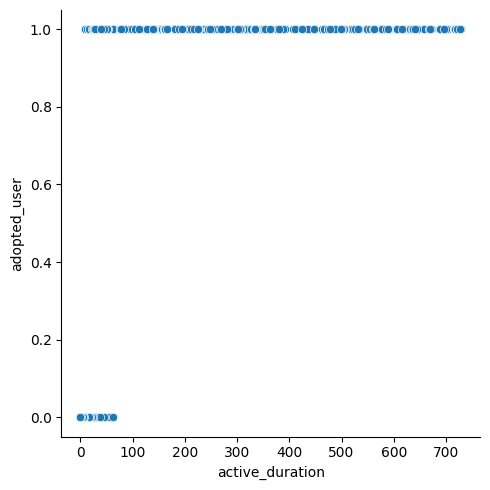

In [37]:
sns.relplot(data = compiled_user_df, x = 'active_duration', y = 'adopted_user',kind = 'scatter');

# 3 Classification

In [38]:
edit_df = compiled_user_df.drop(columns = ['user_id','creation_time','name','email','last_session_creation_time','org_id','invited_by_user_id'])

In [39]:
edit_df.head()

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,invited,active_duration,adopted_user
0,GUEST_INVITE,1,0,1,0.0,0
1,ORG_INVITE,0,0,1,136.0,1
2,ORG_INVITE,0,0,1,0.0,0
3,GUEST_INVITE,0,0,1,1.0,0
4,GUEST_INVITE,0,0,1,5.0,0


In [40]:
from pycaret.classification import *

In [41]:
exp_name = setup(data = edit_df,  
                 target = 'adopted_user',
                 session_id = 22,
                 data_split_stratify = True,
                 categorical_features=['creation_source','opted_in_to_mailing_list','enabled_for_marketing_drip','invited'],
                ordinal_features = None)

,Description,Value
0,Session id,22
1,Target,adopted_user
2,Target type,Binary
3,Original data shape,"(12000, 6)"
4,Transformed data shape,"(12000, 10)"
5,Transformed train set shape,"(8399, 10)"
6,Transformed test set shape,"(3601, 10)"
7,Ordinal features,3
8,Numeric features,4
9,Categorical features,4


To build a model that predicts `adopted_user`, Recall (how many relevant items are retrieved) is used to rank model

In [42]:
top3 = compare_models(n_select = 3, sort = 'Recall')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.9805,0.9965,0.9763,0.9238,0.9491,0.9370,0.9378,0.2170
ada,Ada Boost Classifier,0.9802,0.9981,0.9706,0.9272,0.9482,0.9360,0.9365,0.4740
gbc,Gradient Boosting Classifier,0.9792,0.9979,0.9693,0.9235,0.9455,0.9326,0.9333,0.6850
lightgbm,Light Gradient Boosting Machine,0.9770,0.9975,0.9552,0.9245,0.9393,0.9251,0.9255,0.3440
knn,K Neighbors Classifier,0.9773,0.9934,0.9488,0.9310,0.9395,0.9255,0.9258,0.2780
rf,Random Forest Classifier,0.9751,0.9958,0.9437,0.9246,0.9338,0.9185,0.9188,0.5030
et,Extra Trees Classifier,0.9743,0.9824,0.9309,0.9313,0.9309,0.9151,0.9153,1.0970
lr,Logistic Regression,0.9775,0.9981,0.9277,0.9507,0.9387,0.9249,0.9253,1.1390
dt,Decision Tree Classifier,0.9737,0.9724,0.9252,0.9333,0.9289,0.9128,0.9130,0.2230
svm,SVM - Linear Kernel,0.9762,0.0000,0.9123,0.9583,0.9342,0.9197,0.9205,0.1930


In [43]:
tuned_top3 = [tune_model(i, optimize = 'Recall') for i in top3]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9810,0.9974,0.9936,0.9123,0.9512,0.9394,0.9407
1,0.9845,0.9983,0.9682,0.9500,0.9590,0.9495,0.9495
2,0.9726,0.9968,0.9873,0.8807,0.9309,0.9139,0.9162
3,0.9810,0.9981,0.9745,0.9273,0.9503,0.9385,0.9390
4,0.9798,0.9966,0.9936,0.9064,0.9480,0.9355,0.9370
5,0.9845,0.9982,0.9808,0.9387,0.9592,0.9497,0.9501
6,0.9810,0.9980,0.9679,0.9321,0.9497,0.9379,0.9382
7,0.9810,0.9968,0.9872,0.9167,0.9506,0.9388,0.9398
8,0.9798,0.9977,0.9744,0.9212,0.9470,0.9345,0.9351


Fitting 10 folds for each of 10 candidates, totalling 100 fits


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9774,0.9985,1.0000,0.8920,0.9429,0.9289,0.9313
1,0.9762,0.9983,0.9936,0.8914,0.9398,0.9250,0.9271
2,0.9726,0.9974,0.9936,0.8764,0.9313,0.9143,0.9171
3,0.9786,0.9984,0.9936,0.9017,0.9455,0.9322,0.9339
4,0.9750,0.9977,0.9936,0.8857,0.9366,0.9211,0.9234
5,0.9762,0.9981,1.0000,0.8864,0.9398,0.9250,0.9276
6,0.9821,0.9978,0.9808,0.9273,0.9533,0.9422,0.9428
7,0.9798,0.9977,0.9872,0.9112,0.9477,0.9352,0.9363
8,0.9810,0.9980,0.9808,0.9217,0.9503,0.9385,0.9392


Fitting 10 folds for each of 10 candidates, totalling 100 fits


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9798,0.9977,1.0000,0.9023,0.9486,0.9361,0.9380
1,0.9810,0.9981,0.9427,0.9548,0.9487,0.9370,0.9371
2,0.9726,0.9978,0.9809,0.8851,0.9305,0.9135,0.9154
3,0.9810,0.9986,0.9809,0.9222,0.9506,0.9388,0.9395
4,0.9774,0.9979,0.9744,0.9102,0.9412,0.9272,0.9280
5,0.9810,0.9981,0.9679,0.9321,0.9497,0.9379,0.9382
6,0.9821,0.9979,0.9679,0.9379,0.9527,0.9417,0.9419
7,0.9786,0.9974,0.9679,0.9207,0.9438,0.9305,0.9310
8,0.9798,0.9977,0.9679,0.9264,0.9467,0.9342,0.9346


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [44]:
best_recall_model = automl(optimize = 'Recall')

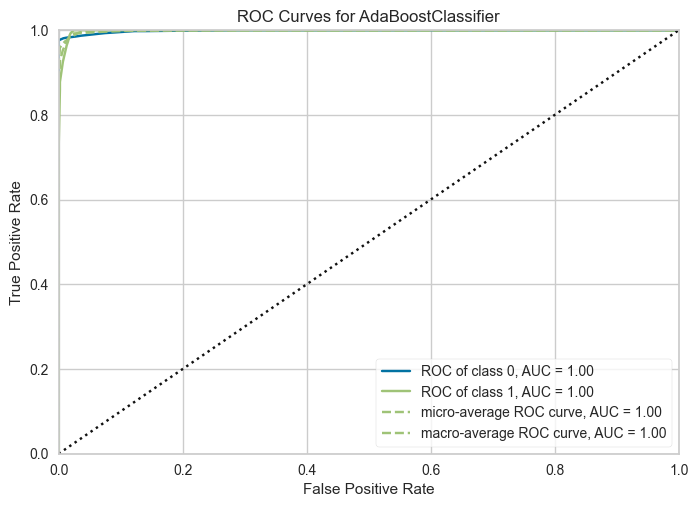

In [45]:
plot_model(best_recall_model, plot = 'auc')

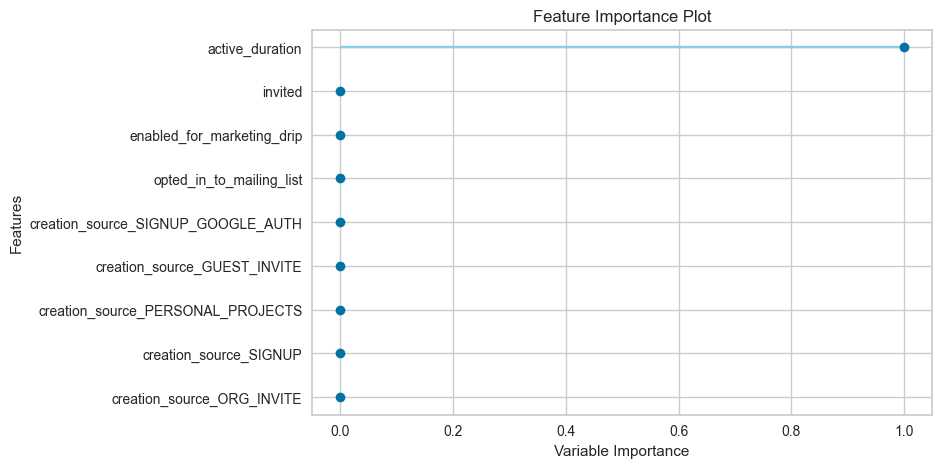

In [46]:
plot_model(best_recall_model, plot = 'feature')

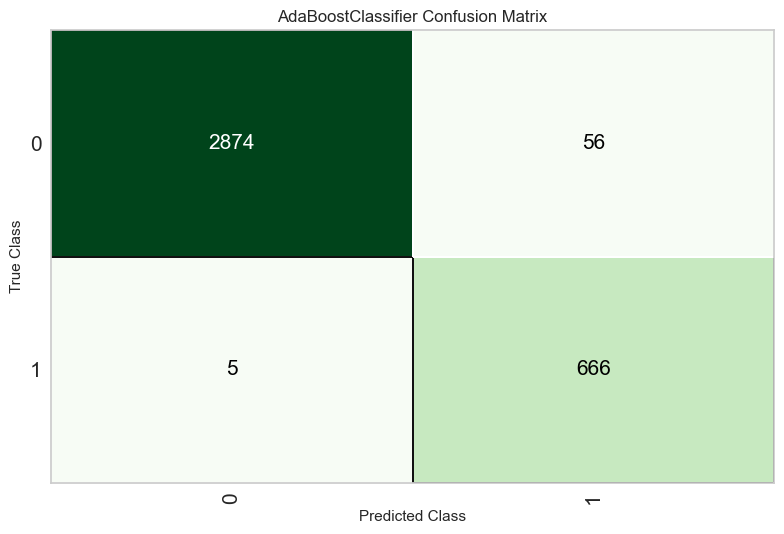

In [47]:
plot_model(best_recall_model, plot = 'confusion_matrix')

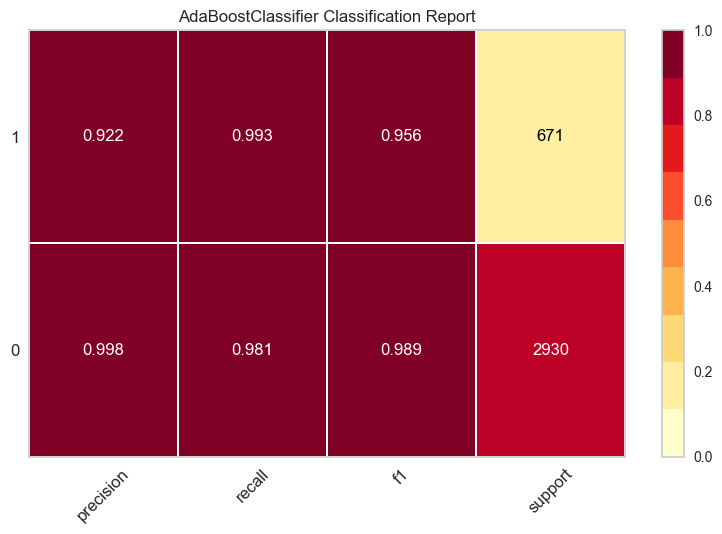

In [48]:
plot_model(best_recall_model, plot = 'class_report')

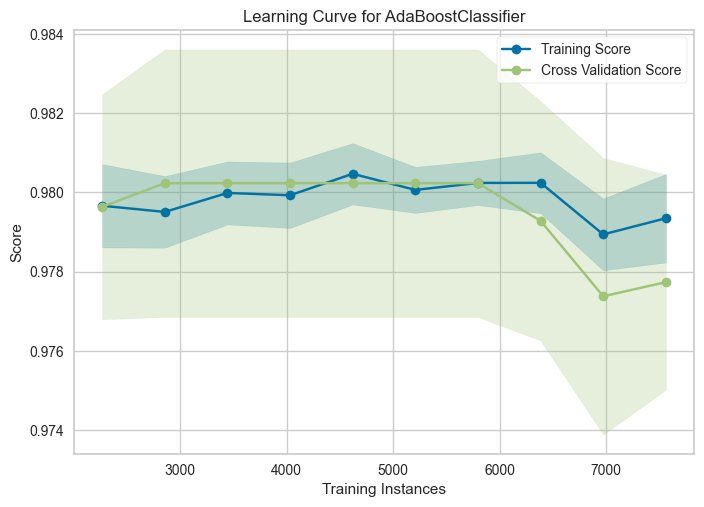

In [49]:
plot_model(best_recall_model, plot = 'learning')

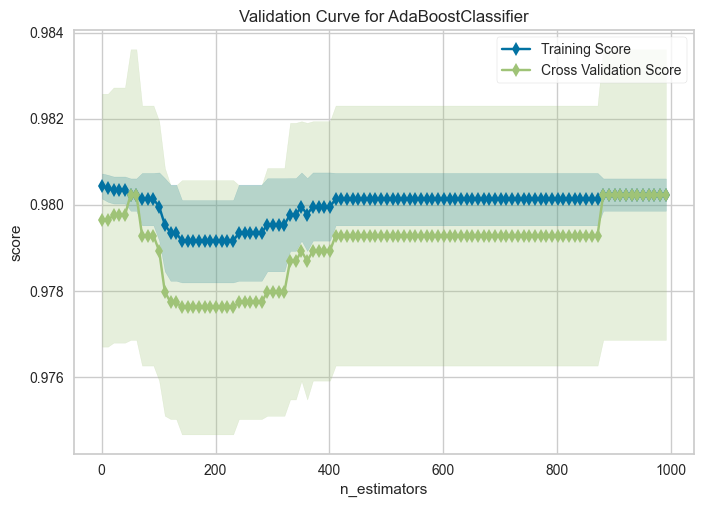

In [50]:
plot_model(best_recall_model, plot = 'vc')

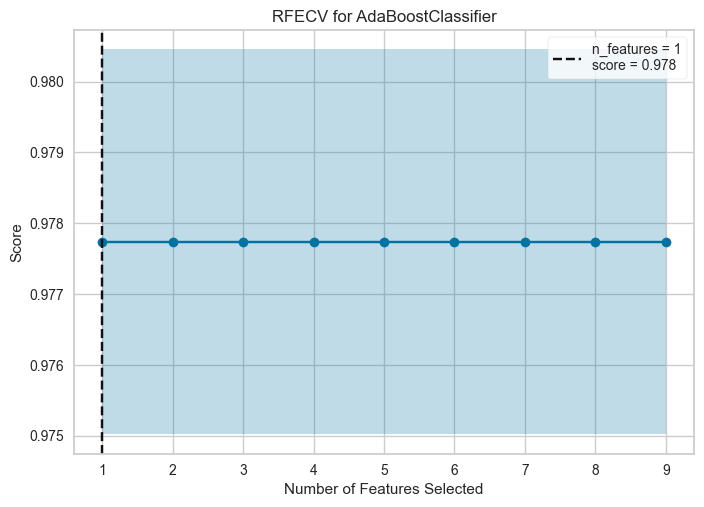

In [51]:
plot_model(best_recall_model, plot = 'rfe')